In [ ]:
import pandas as pd


1. Use decision tree analysis method to predict employment probability(emp) using train
data set. Choose as max depth of the tree equal to 3


In [ ]:
df = pd.read_csv('emp_data_2000_2014.csv')

In [ ]:
df.head()

,emp,age,syear,state,west,mig,edu,nchil,marst,male
0,1,39,2000,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
1,1,40,2001,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
2,1,42,2002,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
3,1,43,2003,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
4,0,44,2004,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1


In [ ]:
df.columns

Index(['emp', 'age', 'syear', 'state', 'west', 'mig', 'edu', 'nchil', 'marst',
       'male'],
      dtype='object')

In [ ]:
y = df['emp']
X = df[['age', 'syear', 'west', 'mig', 'edu', 'nchil', 'marst', 'male']]
X = pd.get_dummies(X, columns=['west', 'mig', 'marst', 'male'], drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.head()

,age,syear,edu,nchil,west_[1] West-Germany 1,mig_migrant,marst_[2] Single 2,marst_[3] Widowed 3,marst_[4] Divorced 4,marst_[5] Separated 5,male_[1] Male 1
0,39,2000,18.0,0,True,False,True,False,False,False,True
1,40,2001,18.0,0,True,False,True,False,False,False,True
2,42,2002,18.0,0,True,False,True,False,False,False,True
3,43,2003,18.0,0,True,False,True,False,False,False,True
4,44,2004,18.0,0,True,False,True,False,False,False,True


In [ ]:
y.head()

,emp
0,1
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

2. Get predictions based on the test data set

In [ ]:
y_pred = clf.predict(X_test)

3. Plot the regression tree based on the tree.


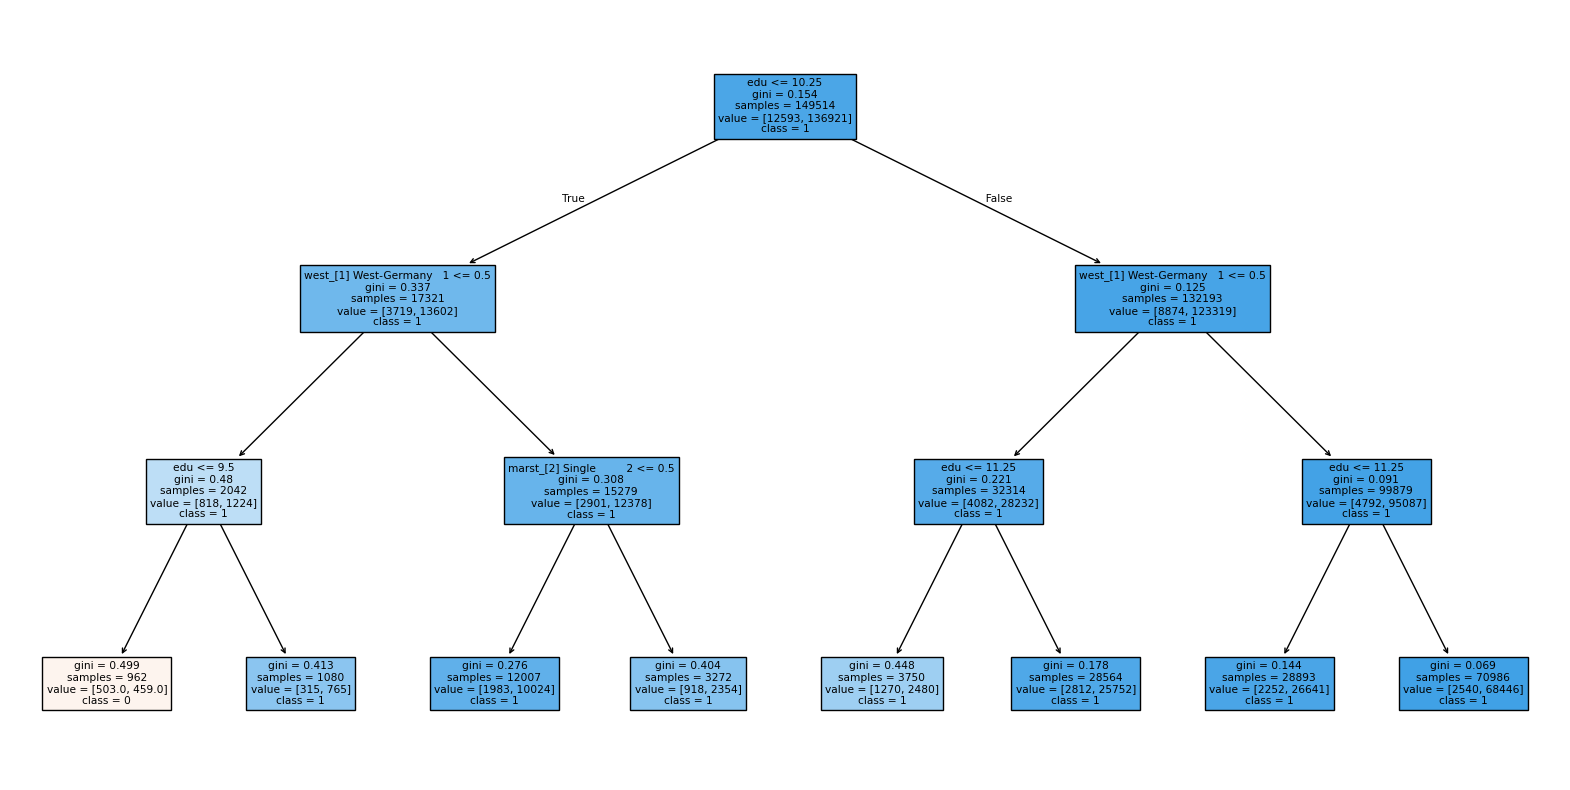

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=["0", "1"],
               filled=True)
plt.show()

4. Based on the tree predict the employment status for a male individual from west,
edu=15, nchil=2, marst=Married.




1.   Education > 10.25 => Right
2.   From West => Right
3.   Education > 11.25 => Right
4.   Class = 1 => Employed

5. Calculate the sensitivity (Recall) and Specificity (Precision) for the model. Compare the
results from the logistic regression results you got from HW2.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

precision = tp / (tp + fp)

print(f"Confusion Matrix:\n{conf_matrix}")

print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")


Confusion Matrix:
[[  241  5156]
 [  215 58466]]
Sensitivity (Recall): 0.9963361224246349
Specificity: 0.0446544376505466
Precision: 0.9189588507120179


From homework 2 I got these values

Confusion Matrix:

[[2 , 3596]

[1 ,  39120]]

Recall (Sensitivity): 1.0000

Precision: 0.9158

1. Logistic Regression Results

Recall = 1.0000 (Perfect recall, meaning all employed individuals were predicted correctly).

Precision = 0.9158 (91.58% of the predicted employed individuals were actually employed).

2. Decision Tree Results

Recall = 0.9963 (The decision tree captured almost all employed individuals, but missed a few compared to logistic regression).

Precision = 0.9189 (Slightly higher than logistic regression, which means better accuracy in predicting employed individuals).

Specificity: 0.0447 (This is quite low, meaning the decision tree struggles to correctly identify unemployed individuals).

6. Get feature importances of independent variables and interpret them

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)


                       Feature  Importance
2                          edu    0.690266
4    west_[1] West-Germany   1    0.269566
6   marst_[2] Single         2    0.040167
0                          age    0.000000
1                        syear    0.000000
3                        nchil    0.000000
5                  mig_migrant    0.000000
7   marst_[3] Widowed        3    0.000000
8   marst_[4] Divorced       4    0.000000
9   marst_[5] Separated      5    0.000000
10   male_[1] Male           1    0.000000


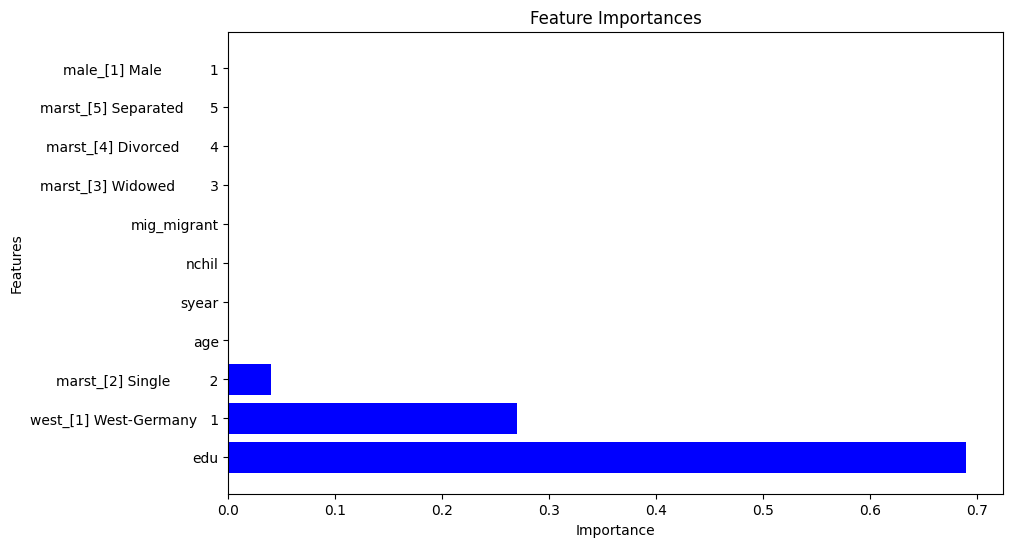

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df["Feature"], importances_df["Importance"], color="blue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()